In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from uszipcode import ZipcodeSearchEngine

In [ ]:
csv_path = os.path.join('..', 'data', 'Zip_Zhvi_2bedroom.csv')
df_2bed = pd.read_csv(csv_path)
csv_path2 = os.path.join('..', 'data', 'Zip_Zhvi_3bedroom.csv')
df_3bed = pd.read_csv(csv_path2)
csv_path3 = os.path.join('..', 'data', 'census_data.csv')
census_df = pd.read_csv(csv_path3)
census_df.head()
len(census_df)

In [3]:
#Extract unique zipcodes 
unique_zip=census_df["Zipcode"].unique()
len(unique_zip)

33120

In [4]:
# Analysis using data for 2 bedroom homes
df_2a = df_2bed[["RegionName", 'City', 'State'
, 'CountyName'
,'2017-11']]
df2 = df_2a[np.isfinite(df_2a['2017-11'])]
df2['2017-11'] = df2['2017-11'].apply(np.int32)
df2 = df2.rename(columns={'RegionName': 'Zipcode', '2017-11' : 'Price'})
df2.head()

C:\Users\vjace\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Zipcode,City,State,CountyName,Price
0,10025,New York,NY,New York,1469200
1,60657,Chicago,IL,Cook,378200
2,10023,New York,NY,New York,1968600
3,60614,Chicago,IL,Cook,405900
4,79936,El Paso,TX,El Paso,84300


In [5]:
#Remove zipcodes that are not 5 digits, keep only 5 digit zipcodes
df2 = df2.drop(df2[df2.Zipcode > 99999].index)
df2 = df2.drop(df2[df2.Zipcode < 9999].index)

In [6]:
# Merge census df and 2br df based on zipcode columns
inner_merge_df = pd.merge(df2, census_df, on="Zipcode")
inner_merge_df.head()
len(inner_merge_df)

9088

In [7]:
inner_merge_df.max()

Zipcode                  99901
City                      Zuni
State                       WY
CountyName              Zavala
Price                  3225300
Population              115104
Median Age                75.5
 Household Income      99,996 
Per Capita Income       207743
Poverty Count            40661
Poverty Rate           60.9442
dtype: object

In [8]:
inner_merge_df.min()

Zipcode                        10003
City                        Aberdeen
State                             AK
CountyName                       Ada
Price                          30100
Population                       123
Median Age                      19.7
 Household Income      (666,666,666)
Per Capita Income               6079
Poverty Count                      0
Poverty Rate                       0
dtype: object

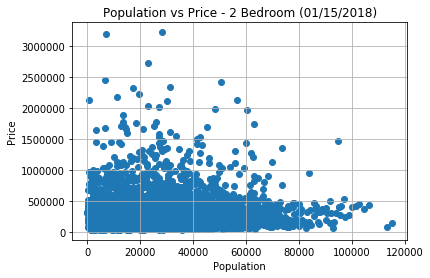

In [9]:
# Population vs Price Plot
# Build a scatter plot for each data type
plt.scatter(inner_merge_df["Population"], inner_merge_df["Price"], marker="o")

# Incorporate the other graph properties
plt.title("Population vs Price - 2 Bedroom (01/15/2018)")
plt.ylabel("Price")
plt.xlabel("Population")
plt.grid(True)

# Save the figure
#plt.savefig("LatitudevsTemperaturePlot")



# Show plot
plt.show()

In [10]:
df_3a = df_3bed[["RegionName", 'City', 'State'
, 'CountyName'
,'2017-11']]
df3 = df_3a[np.isfinite(df_3a['2017-11'])]
df3['2017-11'] = df3['2017-11'].apply(np.int32)
df3 = df3.rename(columns={'RegionName': 'Zipcode', '2017-11' : 'Price'})
df3.head()

,Zipcode,City,State,CountyName,Price
0,60657,Chicago,IL,Cook,567300
1,60614,Chicago,IL,Cook,628700
2,79936,El Paso,TX,El Paso,111700
3,60640,Chicago,IL,Cook,375200
4,77084,Houston,TX,Harris,151400


In [11]:
df3 = df3.drop(df3[df3.Zipcode > 99999].index)
df3 = df3.drop(df3[df3.Zipcode < 9999].index)

In [12]:
# Merge census df and 3br df
inner_merge_df = pd.merge(df3, census_df, on="Zipcode")
inner_merge_df.head()
len(inner_merge_df)

11896

In [13]:
inner_merge_df.max()

Zipcode                  99901
City                      Zuni
State                       WY
CountyName              Zavala
Price                  5319700
Population              115104
Median Age                75.5
 Household Income      99,958 
Per Capita Income       207743
Poverty Count            40661
Poverty Rate           58.5785
dtype: object

In [14]:
inner_merge_df.min()

Zipcode                        10022
City                       Abbeville
State                             AK
CountyName                       Ada
Price                          31900
Population                        17
Median Age              -6.66667e+08
 Household Income      (666,666,666)
Per Capita Income               6079
Poverty Count                      0
Poverty Rate                       0
dtype: object

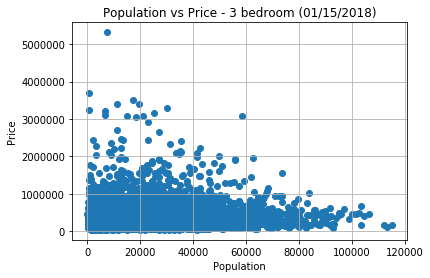

In [15]:
# Population vs Price Plot
# Build a scatter plot for each data type
plt.scatter(inner_merge_df["Population"], inner_merge_df["Price"], marker="o")

# Incorporate the other graph properties
plt.title("Population vs Price - 3 bedroom (01/15/2018)")
plt.ylabel("Price")
plt.xlabel("Population")
plt.grid(True)

# Save the figure
#plt.savefig("LatitudevsTemperaturePlot")



# Show plot
plt.show()

In [16]:
from uszipcode import ZipcodeSearchEngine
search = ZipcodeSearchEngine()
zipcode = search.by_zipcode("77979")
print(zipcode)
print(zipcode['Latitude'])
print(zipcode['Longitude'])

{
    "City": "Port Lavaca",
    "Density": 50.2800832917852,
    "HouseOfUnits": 7643,
    "LandArea": 340.97,
    "Latitude": 28.5585152,
    "Longitude": -96.6210611,
    "NEBoundLatitude": 28.770518,
    "NEBoundLongitude": -96.322918,
    "Population": 17144,
    "SWBoundLatitude": 28.414631099999998,
    "SWBoungLongitude": -96.913421,
    "State": "TX",
    "TotalWages": 247092930.0,
    "WaterArea": 131.99,
    "Wealthy": 14412.79339710686,
    "Zipcode": "77979",
    "ZipcodeType": "Standard"
}
28.5585152
-96.6210611


In [17]:
inner_merge_df.head()

,Zipcode,City,State,CountyName,Price,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,60657,Chicago,IL,Cook,567300,70105,30.9,"84,319",67680.0,6455,9.207617
1,60614,Chicago,IL,Cook,628700,69817,30.1,"94,640",71659.0,6822,9.771259
2,79936,El Paso,TX,El Paso,111700,113255,31.2,"52,422",22053.0,15663,13.829853
3,60640,Chicago,IL,Cook,375200,67088,37.5,"47,390",38673.0,14206,21.175173
4,77084,Houston,TX,Harris,151400,103635,32.6,"66,914",27973.0,11839,11.423747


In [18]:
latlnglist = []

for zip in inner_merge_df['Zipcode']:
    search = ZipcodeSearchEngine()
    zipcode = search.by_zipcode(zip)
    lat = zipcode['Latitude']
    lng = zipcode['Longitude']
    zipcoord = {"Zipcode": zip, "Lat":lat, "Lng": lng}
    latlnglist.append(zipcoord)
   


In [32]:
hdf = pd.DataFrame(latlnglist)
hdf.head()

,Lat,Lng,Zipcode
0,41.940379,-87.653180,60657
1,41.920347,-87.643314,60614
2,31.759979,-106.287521,79936
3,41.970313,-87.663045,60640
4,29.829651,-95.666831,77084


In [33]:
latlngmerge = pd.merge(inner_merge_df, hdf, on="Zipcode")
latlngmerge.head()

,Zipcode,City,State,CountyName,Price,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Lat,Lng
0,60657,Chicago,IL,Cook,567300,70105,30.9,"84,319",67680.0,6455,9.207617,41.940379,-87.653180
1,60614,Chicago,IL,Cook,628700,69817,30.1,"94,640",71659.0,6822,9.771259,41.920347,-87.643314
2,79936,El Paso,TX,El Paso,111700,113255,31.2,"52,422",22053.0,15663,13.829853,31.759979,-106.287521
3,60640,Chicago,IL,Cook,375200,67088,37.5,"47,390",38673.0,14206,21.175173,41.970313,-87.663045
4,77084,Houston,TX,Harris,151400,103635,32.6,"66,914",27973.0,11839,11.423747,29.829651,-95.666831


In [34]:
hkdf = latlngmerge

In [35]:
hkdf.max()

Zipcode                  99901
City                      Zuni
State                       WY
CountyName              Zavala
Price                  5319700
Population              115104
Median Age                75.5
 Household Income      99,958 
Per Capita Income       207743
Poverty Count            40661
Poverty Rate           58.5785
Lat                    64.8774
Lng                     2.2847
dtype: object

In [36]:
hkdf.min()

Zipcode                        10022
City                       Abbeville
State                             AK
CountyName                       Ada
Price                          31900
Population                        17
Median Age              -6.66667e+08
 Household Income      (666,666,666)
Per Capita Income               6079
Poverty Count                      0
Poverty Rate                       0
Lat                          19.2519
Lng                         -159.502
dtype: object

In [37]:
bins = [0, 30000, 60000, 120000]

group_names = ['Low', 'Middle', 'High']
pd.cut(hkdf["Population"], bins, labels=group_names)
hkdf["Population"] = pd.cut(hkdf["Population"],
                                           bins, labels=group_names)
hkdf.head()

,Zipcode,City,State,CountyName,Price,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Lat,Lng
0,60657,Chicago,IL,Cook,567300,High,30.9,"84,319",67680.0,6455,9.207617,41.940379,-87.653180
1,60614,Chicago,IL,Cook,628700,High,30.1,"94,640",71659.0,6822,9.771259,41.920347,-87.643314
2,79936,El Paso,TX,El Paso,111700,High,31.2,"52,422",22053.0,15663,13.829853,31.759979,-106.287521
3,60640,Chicago,IL,Cook,375200,High,37.5,"47,390",38673.0,14206,21.175173,41.970313,-87.663045
4,77084,Houston,TX,Harris,151400,High,32.6,"66,914",27973.0,11839,11.423747,29.829651,-95.666831


In [38]:
Lowpop = hkdf[hkdf["Population"] == "Low"]
Mediumpop = hkdf[hkdf["Population"] == "Middle"]
Highpop = hkdf[hkdf["Population"] == "High"]

lowlat = Lowpop.groupby(["Zipcode"]).max()["Lat"]
lowlng = Lowpop.groupby(["Zipcode"]).max()["Lng"]
lowprice = Lowpop.groupby(["Zipcode"]).mean()["Price"]

Mediumlat = Mediumpop.groupby(["Zipcode"]).max()["Lat"]
Mediumlng = Mediumpop.groupby(["Zipcode"]).max()["Lng"]
Mediumprice = Mediumpop.groupby(["Zipcode"]).mean()["Price"]

Highlat = Highpop.groupby(["Zipcode"]).max()["Lat"]
Highlng = Highpop.groupby(["Zipcode"]).max()["Lng"]
Highprice = Mediumpop.groupby(["Zipcode"]).mean()["Price"]


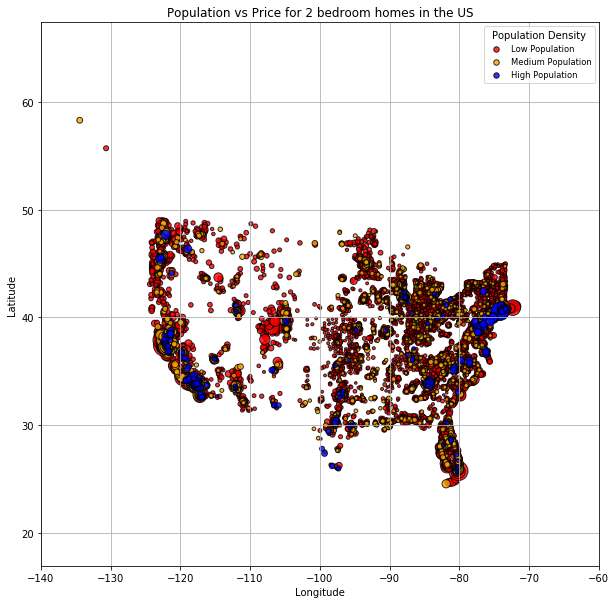

In [41]:
plt.figure(figsize = (10,10))
plt.scatter(lowlng, 
            lowlat, 
            s=lowprice / 10000, c="red", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Low Population")

plt.scatter(Mediumlng, 
            Mediumlat, 
            s=Mediumprice / 10000, c="orange", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Medium Population")

plt.scatter(Highlng, 
            Highlat, 
            s=Highprice / 10000, c="blue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="High Population")

plt.title("Population vs Price for 2 bedroom homes in the US")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="Population Density", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.xlim((-140,-60))
# Incorporate a text label regarding circle size
# plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")

plt.show()

In [ ]:
dollar = '$'